In [1]:
#import required libraries
import pandas as pd
import numpy as np


In [2]:
content=pd.read_csv("/content/Content.csv")
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
reactions=pd.read_csv("/content/Reactions.csv")
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
reactiontype=pd.read_csv("/content/ReactionTypes.csv")
reactiontype.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


cleaning the dataset


dropping columns

In [ ]:
content.drop("Unnamed: 0",axis=1,inplace=True)
reactions.drop("Unnamed: 0",axis=1,inplace=True)
reactiontype.drop("Unnamed: 0",axis=1,inplace=True)

Marge the data set

In [6]:
df=content.merge(reactions,how='left',on='User ID')
df=df.rename(columns=({'Type_x':'Cont_Type','Type_y':'Type'}))

In [7]:
df=df.merge(reactiontype,how='left',on='Type')
df = df.rename(columns={'Type':'React_Type'})

In [8]:
df.head()

,Unnamed: 0_x,Content ID_x,User ID,Cont_Type,Category,URL,Unnamed: 0_y,Content ID_y,React_Type,Datetime,Unnamed: 0,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,236,5118e9c5-1377-4cc5-a486-65b35b7b7b76,intrigued,2020-07-28 07:01:21,12,positive,45
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,483,850fe90d-47d6-4eb7-b9c8-810afcb99ce9,hate,2021-05-29 04:12:17,3,negative,5
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,952,07f88a73-aef2-45fd-8b5d-418e448b853d,hate,2021-01-19 22:28:57,3,negative,5
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,1004,457301ee-3e87-40d8-8b82-ea4e1fa90e39,want,2020-08-10 05:25:41,1,positive,70
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,2414,497da46d-d5d5-45b0-827a-f2b75d7bf4c2,interested,2021-01-24 09:03:31,4,positive,30


Basic analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44877 entries, 0 to 44876
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0_x  44877 non-null  int64 
 1   Content ID_x  44877 non-null  object
 2   User ID       44877 non-null  object
 3   Cont_Type     44877 non-null  object
 4   Category      44877 non-null  object
 5   URL           36080 non-null  object
 6   Unnamed: 0_y  44877 non-null  int64 
 7   Content ID_y  44877 non-null  object
 8   React_Type    44877 non-null  object
 9   Datetime      44877 non-null  object
 10  Unnamed: 0    44877 non-null  int64 
 11  Sentiment     44877 non-null  object
 12  Score         44877 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [10]:
df.isnull().sum()

Unnamed: 0_x       0
Content ID_x       0
User ID            0
Cont_Type          0
Category           0
URL             8797
Unnamed: 0_y       0
Content ID_y       0
React_Type         0
Datetime           0
Unnamed: 0         0
Sentiment          0
Score              0
dtype: int64

In [11]:
df.drop('URL',axis=1,inplace=True)

In [12]:
df.head()

,Unnamed: 0_x,Content ID_x,User ID,Cont_Type,Category,Unnamed: 0_y,Content ID_y,React_Type,Datetime,Unnamed: 0,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,236,5118e9c5-1377-4cc5-a486-65b35b7b7b76,intrigued,2020-07-28 07:01:21,12,positive,45
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,483,850fe90d-47d6-4eb7-b9c8-810afcb99ce9,hate,2021-05-29 04:12:17,3,negative,5
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,952,07f88a73-aef2-45fd-8b5d-418e448b853d,hate,2021-01-19 22:28:57,3,negative,5
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,1004,457301ee-3e87-40d8-8b82-ea4e1fa90e39,want,2020-08-10 05:25:41,1,positive,70
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,2414,497da46d-d5d5-45b0-827a-f2b75d7bf4c2,interested,2021-01-24 09:03:31,4,positive,30


In [13]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44877 entries, 0 to 44876
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0_x  44877 non-null  int64 
 1   Content ID_x  44877 non-null  object
 2   User ID       44877 non-null  object
 3   Cont_Type     44877 non-null  object
 4   Category      44877 non-null  object
 5   Unnamed: 0_y  44877 non-null  int64 
 6   Content ID_y  44877 non-null  object
 7   React_Type    44877 non-null  object
 8   Datetime      44877 non-null  object
 9   Unnamed: 0    44877 non-null  int64 
 10  Sentiment     44877 non-null  object
 11  Score         44877 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [14]:
df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [18]:
#making in an uniform way
df['Category']= df['Category'].replace('"', '', regex=True)
df['Category']=df['Category'].str.lower()

In [19]:
df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

Saving the data as a csv file

In [20]:
df.to_csv('data.csv',index=False)

In [21]:
#top 5 performing categories
df.groupby('Category').agg({"React_Type" : "count"}).reset_index().sort_values(by='React_Type', ascending=False).head(5)

,Category,React_Type
0,animals,3230
12,technology,3230
14,travel,3131
9,science,3092
2,culture,2968


In [22]:
df.groupby('Category').agg({"Score" : "sum"}).reset_index().sort_values(by='Score', ascending=False).head()

,Category,Score
12,technology,127947
0,animals,127701
14,travel,126389
9,science,122172
2,culture,120907


Data Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


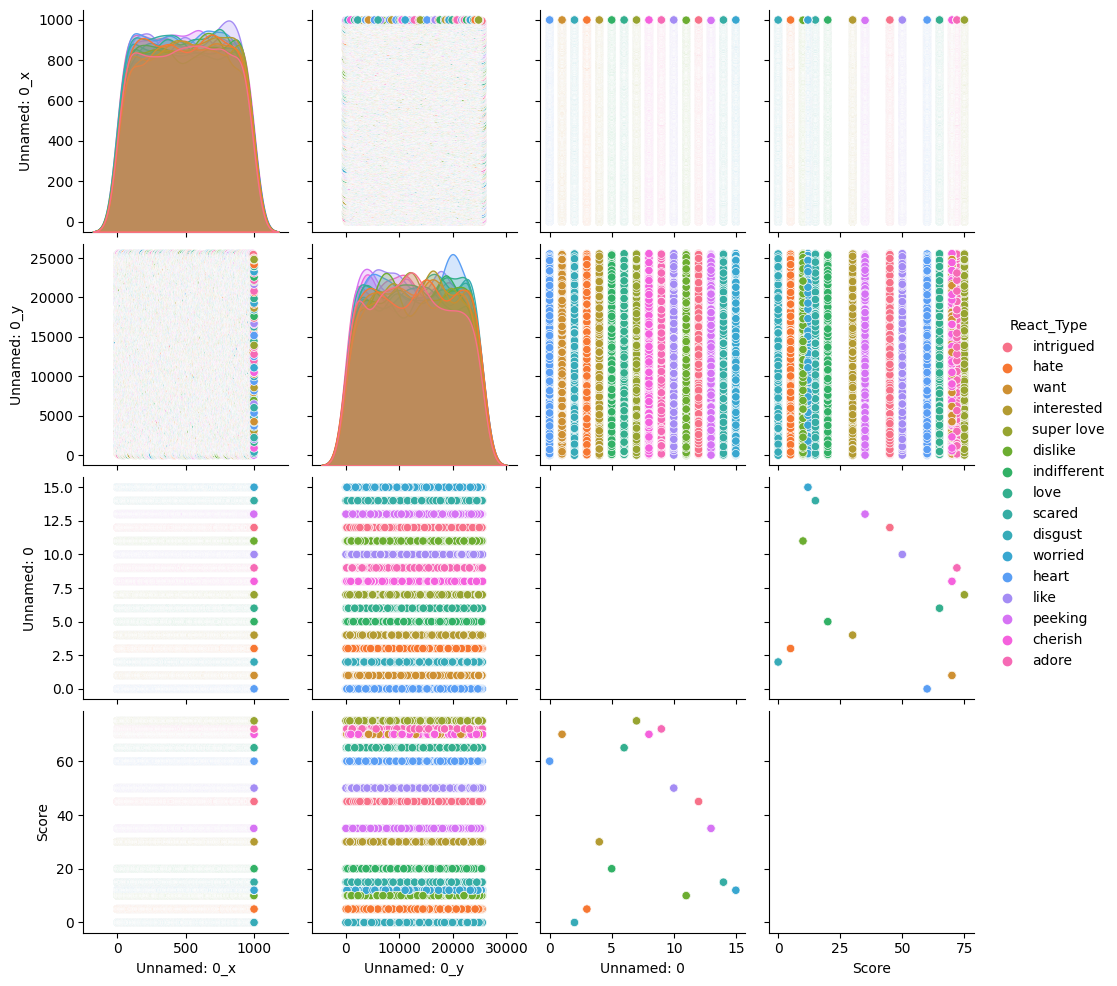

In [28]:
sns.pairplot(df,hue='React_Type')

Text(0, 0.5, 'Sentiment Score')

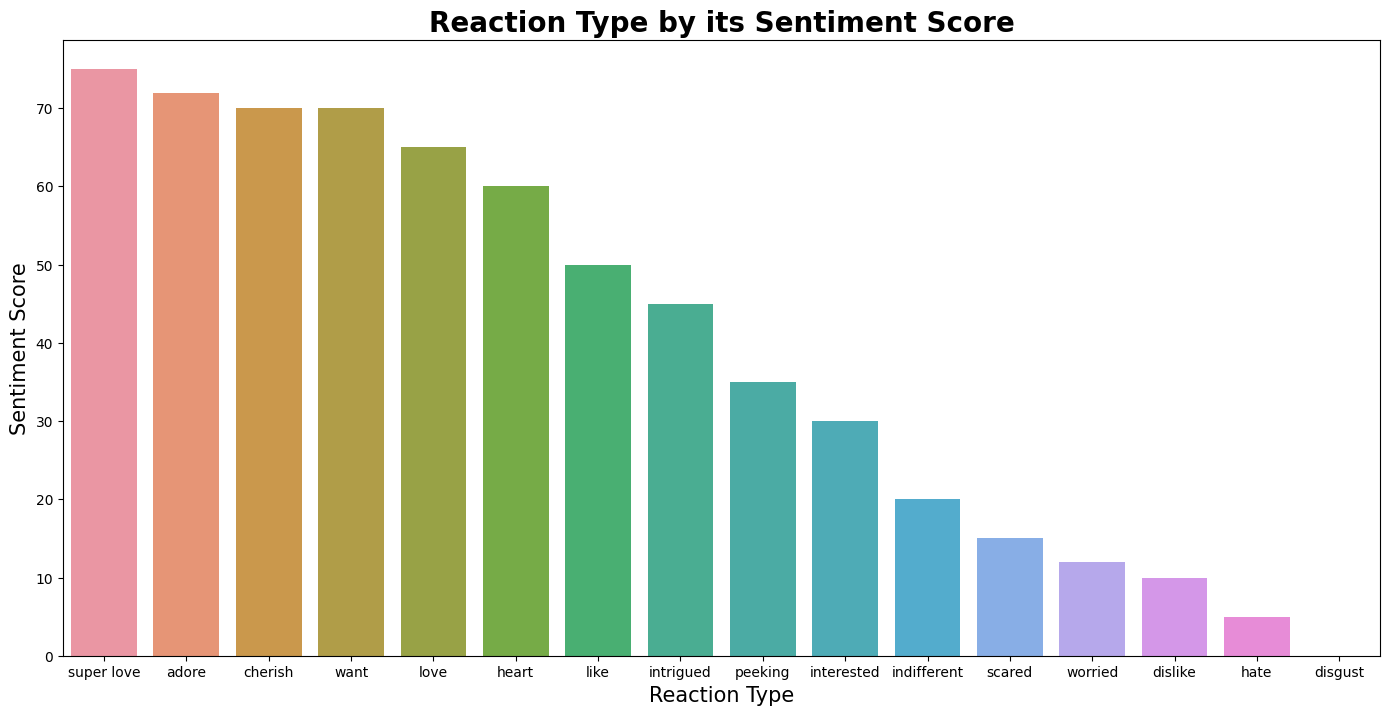

In [33]:
react_type_score = df.groupby('React_Type')['Score'].mean().reset_index()
plt.figure(figsize=(17,8))
sns.barplot(x='React_Type', y='Score', data=react_type_score, order=react_type_score.sort_values(by='Score', ascending=False)['React_Type'])

plt.title('Reaction Type by its Sentiment Score', fontsize=20, weight='extra bold')
plt.xlabel('Reaction Type', fontsize=15)
plt.ylabel('Sentiment Score', fontsize=15)